### Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [56]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn as sk 
import seaborn as sb

pd.set_option('display.max_columns', None)

%matplotlib inline


#### Step 2: Examine your data 

In [34]:
df_raw = pd.read_csv("assets/airport_cancellations.csv")
df = df_raw.dropna() 


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 804
Data columns (total 6 columns):
Airport                    805 non-null object
Year                       805 non-null float64
Departure Cancellations    805 non-null float64
Arrival Cancellations      805 non-null float64
Departure Diversions       805 non-null float64
Arrival Diversions         805 non-null float64
dtypes: float64(5), object(1)
memory usage: 44.0+ KB


In [36]:
df.corr()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
Year,1.000000,-0.069382,-0.065905,-0.014727,-0.030503
Departure Cancellations,-0.069382,1.000000,0.997469,0.796852,0.792645
Arrival Cancellations,-0.065905,0.997469,1.000000,0.814804,0.794165
Departure Diversions,-0.014727,0.796852,0.814804,1.000000,0.840629
Arrival Diversions,-0.030503,0.792645,0.794165,0.840629,1.000000


In [37]:
df.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2008.986335,1292.038509,1333.124224,173.315528,169.413665
std,3.158116,1835.961943,1975.224868,172.345539,228.521615
min,2004.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,349.000000,314.000000,62.000000,41.000000
50%,2009.000000,663.000000,642.000000,110.000000,84.000000
75%,2012.000000,1472.000000,1523.000000,236.000000,190.000000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000


In [38]:
df.var()

Year                       9.973694e+00
Departure Cancellations    3.370756e+06
Arrival Cancellations      3.901513e+06
Departure Diversions       2.970298e+04
Arrival Diversions         5.222213e+04
dtype: float64

In [39]:
df.rename(columns=lambda x: x.replace(' ', '_').lower(), inplace=True)

In [40]:
df.head(1)

,airport,year,departure_cancellations,arrival_cancellations,departure_diversions,arrival_diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0


In [41]:
df['airport'].nunique()

74

In [42]:
df_raw2 = pd.read_csv("assets/airport_operations.csv")
df2 = df_raw2.dropna() 
df2.rename(columns=lambda x: x.replace(' ', '_').lower(), inplace=True)

In [43]:
df2.head(1)

,airport,year,departures_for_metric_computation,arrivals_for_metric_computation,percent_on-time_gate_departures,percent_on-time_airport_departures,percent_on-time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_in_delay,average_block_delay,average_gate_arrival_delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures_for_metric_computation     841 non-null int64
arrivals_for_metric_computation       841 non-null int64
percent_on-time_gate_departures       841 non-null float64
percent_on-time_airport_departures    841 non-null float64
percent_on-time_gate_arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average_taxi_out_delay                841 non-null float64
average_airport_departure_delay       841 non-null float64
average_airborne_delay                841 non-null float64
average_taxi_in_delay                 841 non-null float64
average_block_delay                   841 non-null float64
average_gate_arrival_delay            841 non-null float64
dtypes: float64(1

In [45]:
df.describe()

,year,departure_cancellations,arrival_cancellations,departure_diversions,arrival_diversions
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2008.986335,1292.038509,1333.124224,173.315528,169.413665
std,3.158116,1835.961943,1975.224868,172.345539,228.521615
min,2004.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,349.000000,314.000000,62.000000,41.000000
50%,2009.000000,663.000000,642.000000,110.000000,84.000000
75%,2012.000000,1472.000000,1523.000000,236.000000,190.000000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000


In [46]:
df.var()

year                       9.973694e+00
departure_cancellations    3.370756e+06
arrival_cancellations      3.901513e+06
departure_diversions       2.970298e+04
arrival_diversions         5.222213e+04
dtype: float64

In [47]:
df2['airport'].nunique()

77

In [48]:
df_raw3 = pd.read_csv('assets/airports.csv')
df3 = df_raw3.dropna()
df3.rename(columns=lambda x: x.replace(' ', '_').lower(), inplace=True)

In [49]:
df3.head(1)

,key,locid,ap_name,alias,facility_type,faa_region,county,city,state,ap_type,latitude,longitude,boundary_data_available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes


In [50]:
df3.rename(columns={'locid':'airport'}, inplace=True)

In [51]:
# time to merge the dataframes
df4 = df.merge(df2, on=['airport', 'year'])

In [52]:
df4 = df4.merge(df3, on='airport')

In [53]:
df4.head(1)

,airport,year,departure_cancellations,arrival_cancellations,departure_diversions,arrival_diversions,departures_for_metric_computation,arrivals_for_metric_computation,percent_on-time_gate_departures,percent_on-time_airport_departures,percent_on-time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_in_delay,average_block_delay,average_gate_arrival_delay,key,ap_name,alias,facility_type,faa_region,county,city,state,ap_type,latitude,longitude,boundary_data_available
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87,2348.0,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


In [57]:
df4.describe()

,year,departure_cancellations,arrival_cancellations,departure_diversions,arrival_diversions,departures_for_metric_computation,arrivals_for_metric_computation,percent_on-time_gate_departures,percent_on-time_airport_departures,percent_on-time_gate_arrivals,average_gate_departure_delay,average_taxi_out_time,average_taxi_out_delay,average_airport_departure_delay,average_airborne_delay,average_taxi_in_delay,average_block_delay,average_gate_arrival_delay,key,latitude,longitude
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2009.016270,1299.314143,1341.068836,174.250313,170.256571,113471.568210,113003.959950,0.779123,0.726958,0.766864,12.890250,13.872879,3.683292,15.703504,2.875532,1.414155,3.290826,13.428811,1714.484355,36.448807,-94.899998
std,3.150126,1840.877193,1980.459892,172.638408,229.162686,98059.144667,97705.308115,0.052279,0.076027,0.050502,3.036474,3.806217,2.337325,4.364217,1.169739,0.854702,0.989275,3.251647,1005.059201,6.686781,20.644996
min,2004.000000,0.000000,0.000000,0.000000,0.000000,731.000000,717.000000,0.529900,0.380800,0.513600,5.350000,7.240000,0.100000,6.290000,0.950000,0.020000,1.330000,6.330000,246.000000,18.439295,-157.922429
25%,2006.000000,349.000000,314.500000,62.000000,41.000000,42064.000000,42006.500000,0.753100,0.691800,0.742150,10.830000,11.475000,2.300000,12.890000,2.035000,0.845000,2.615000,11.270000,770.000000,32.896828,-111.977773
50%,2009.000000,670.000000,653.000000,111.000000,84.000000,79489.000000,79750.000000,0.784100,0.740200,0.770500,12.540000,12.940000,3.050000,15.130000,2.620000,1.140000,3.130000,12.970000,1531.000000,37.618972,-87.897068
75%,2012.000000,1483.500000,1542.000000,237.000000,190.000000,166469.500000,165560.500000,0.810700,0.773700,0.797600,14.620000,15.745000,4.220000,17.555000,3.550000,1.775000,3.815000,14.935000,2502.000000,40.795250,-80.152741
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,35.760000,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000,3575.000000,61.174083,-66.002004


In [77]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 798
Data columns (total 31 columns):
airport                               799 non-null object
year                                  799 non-null float64
departure_cancellations               799 non-null float64
arrival_cancellations                 799 non-null float64
departure_diversions                  799 non-null float64
arrival_diversions                    799 non-null float64
departures_for_metric_computation     799 non-null int64
arrivals_for_metric_computation       799 non-null int64
percent_on-time_gate_departures       799 non-null float64
percent_on-time_airport_departures    799 non-null float64
percent_on-time_gate_arrivals         799 non-null float64
average_gate_departure_delay          799 non-null float64
average_taxi_out_time                 799 non-null float64
average_taxi_out_delay                799 non-null float64
average_airport_departure_delay       799 non-null float64
average_airborn

In [90]:
column_list = list(df4.select_dtypes(include=['float64', 'int64']).columns)

In [92]:
X = df4[column_list]

In [95]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [98]:
df5 = pd.DataFrame(X)

In [58]:
plot_df = df4[['departure_cancellations', 'arrival_cancellations']]

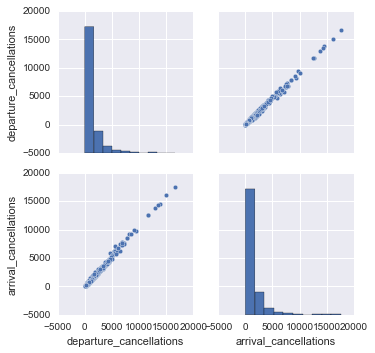

In [59]:
sns.pairplot(plot_df)

### Intro: Write a problem statement / aim for this project

We want to understand the behavior of flight cancellations
Answer: How are we going to do this?

### Part 1: Create a SQLite database 

#### 1. Let's create a database where we can house our airport data

In [28]:
import pandas as pd
from pandas.io import sql

import sqlite3
sqlite_db = 'stop_calling_me_shirley.sqlite'
conn = sqlite3.connect(sqlite_db)


Load our csv files into tables

In [29]:
airport_df.to_sql('airports',con=conn,if_exists='replace',index=False)
# pd.read_csv('path/to/file',encoding='utf-8').to_sql('table_name',con=conn,if_exists='replace',index=False)

In [30]:
airport_cancellations_df.to_sql('airport_cancels',con=conn,if_exists='replace',index=False)

In [31]:
airport_operations_df.to_sql('airport_cancels',con=conn,if_exists='replace',index=False)

Join airport_cancellations.csv and airports.csv into one table (try to do it with both pandas and SQLite)

In [21]:
airport_df = pd.read_csv('assets/airports.csv')
airport_df['ALIAS'].iloc[3]

'Aeropuerto Antonio Rivera Rodr\xef\xbf\xbdguez'

In [22]:
def conv_to_utf(a):
    return str(a).decode('utf-8')

airport_df['ALIAS'] = airport_df['ALIAS'].apply(conv_to_utf)

In [9]:
# LocID in airports.csv 
# is the same as Airport in airport_cancellations.csv
# so these are what you would join on ...


joined_df = pd.merge(airport_cancellations_df,airport_df,
                     left_on = 'Airport', right_on = 'LocID')


In [13]:
joined_df[:3]

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004.0,242.0,235.0,71.0,46.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005.0,221.0,190.0,61.0,33.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006.0,392.0,329.0,71.0,124.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


Query the database for our intial data

In [10]:
#cur = conn.cursor()
#cur.execute("""SELECT * FROM mydb""")
#ap = cur.fetchall()
#print ap

#### 1.2 What are the risks and assumptions of our data? 

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [11]:
#ap.head()
#ap.describe()


#### Are there any unique values? 

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

#### 3.2 Format and Clean the Data

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

#### 4.2 Find correlations in the data

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: 

#### 4.4 Validate your findings using statistical analysis

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA and Present Findings

#### 5.1 Conduct the PCA

#### 5.2 Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps